### Generate Datasets

download mcx, from https://github.com/fangq/mcx.git

go to src dir and run $make

Download nightly version of mcxlab (http://mcx.space/nightly/), overwriting the default one.

Go to mcxlab folder, open matlab.

Run the following scripts to generate image (in mat format) in mcxlab folder.

* genImage_osa_1e5_to_1e8.m
* genImage_osa_1e9.m (10x1e8 and take average, as the clean image)
* genImage_osa_1e5_TestingSet.m (100 testing dataset for 1e5 simulation)

Example Link:
* https://github.com/3upperm2n/mcx_ImageDenoising/blob/master/data/genImage_osa_1e5_to_1e8.m



##### generating data sets used in OSA ( in matlab)

```matlab
%% generating data sets used in OSA

clear all

% Top-level Dir
topFolderName='osa_data';
if ~exist('osa_data', 'dir')  mkdir(topFolderName); end

N = 100; % run N times simulation for each test, 
x = 100;
y = 100;
z = 100;
time = zeros(N,5);
pho_cnt = [1e5, 1e6, 1e7, 1e8];  % use 10 x 1e8 for 1e9 (as the ground truth)
volume = uint8(ones(x,y,z));


for k=1:4
	% Generate new random seed for Monte Carlo simulation
	rand_seed = randi([1 2^31-1], 1, N);
	
	if (length(unique(rand_seed)) < length(rand_seed)) ~= 0
		error('There are repeated random seeds!')
	end

	dir_phn = sprintf('./%s/%1.0e', topFolderName, pho_cnt(k));
    
    if ~exist(dir_phn, 'dir')  mkdir(dir_phn); end

	for tid =1:N
		dir_phn_test = sprintf('%s/%d', dir_phn, tid);
        
        if ~exist(dir_phn_test, 'dir')  mkdir(dir_phn_test); end

		clear cfg
		cfg.nphoton=pho_cnt(k);
		cfg.vol= volume;
		cfg.srcpos=[50 50 1];
		cfg.srcdir=[0 0 1];
		cfg.gpuid=1;
		% cfg.gpuid='11'; % use two GPUs together
		cfg.autopilot=1;
		cfg.prop=[0 0 1 1;0.005 1 0 1.37];
		cfg.tstart=0;
		cfg.tend=5e-8;
		cfg.tstep=5e-8;
		cfg.seed = rand_seed(tid); % each random seed will have different pattern 

		% calculate the flux distribution with the given config
		[flux,detpos]=mcxlab(cfg);

		image3D=flux.data;

		%%% export each image in 3D volume
		for imageID=1:y
			fname = sprintf('%s/osa_phn%1.0e_test%d_img%d.mat', dir_phn_test, pho_cnt(k), tid, imageID);
			fprintf('Generating %s\n',fname);
			currentImage = squeeze(image3D(:,imageID,:));
			feval('save', fname, 'currentImage');

		end
	end
end

```

### plot image 1 and image 50 along the y-axis

In [1]:
from IPython.display import Image

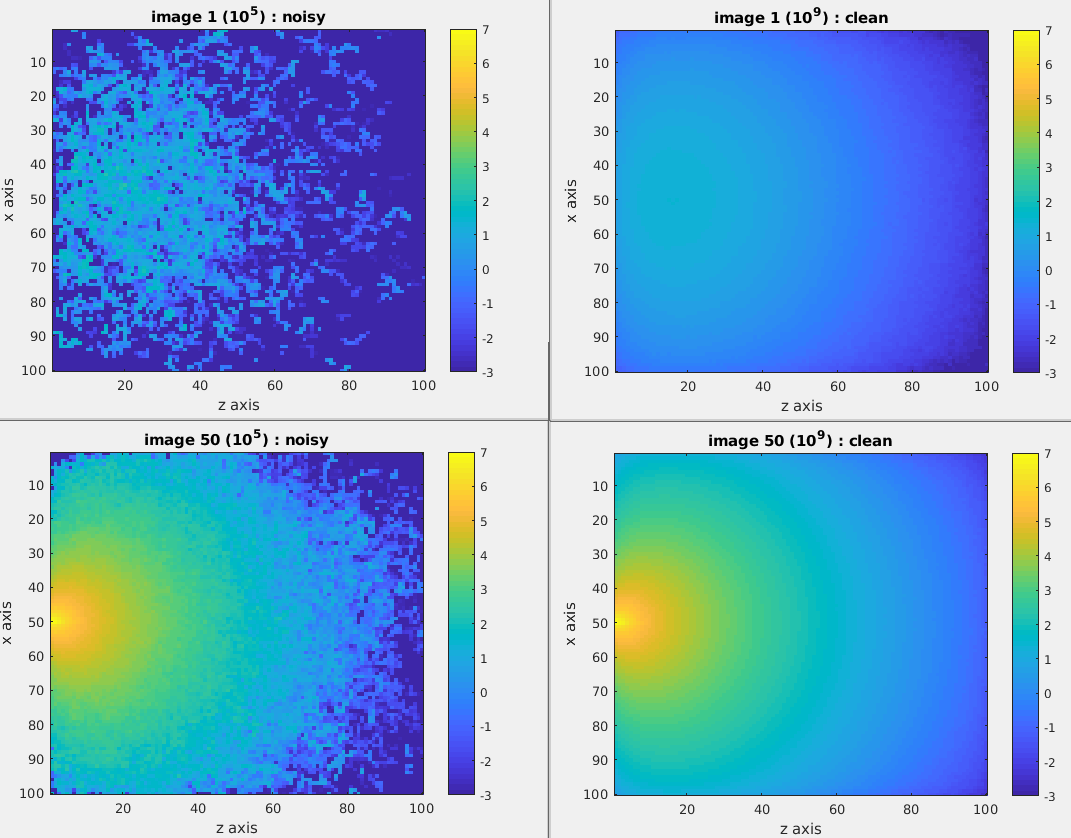

In [2]:
Image("figs/1e5_and_clean.png")

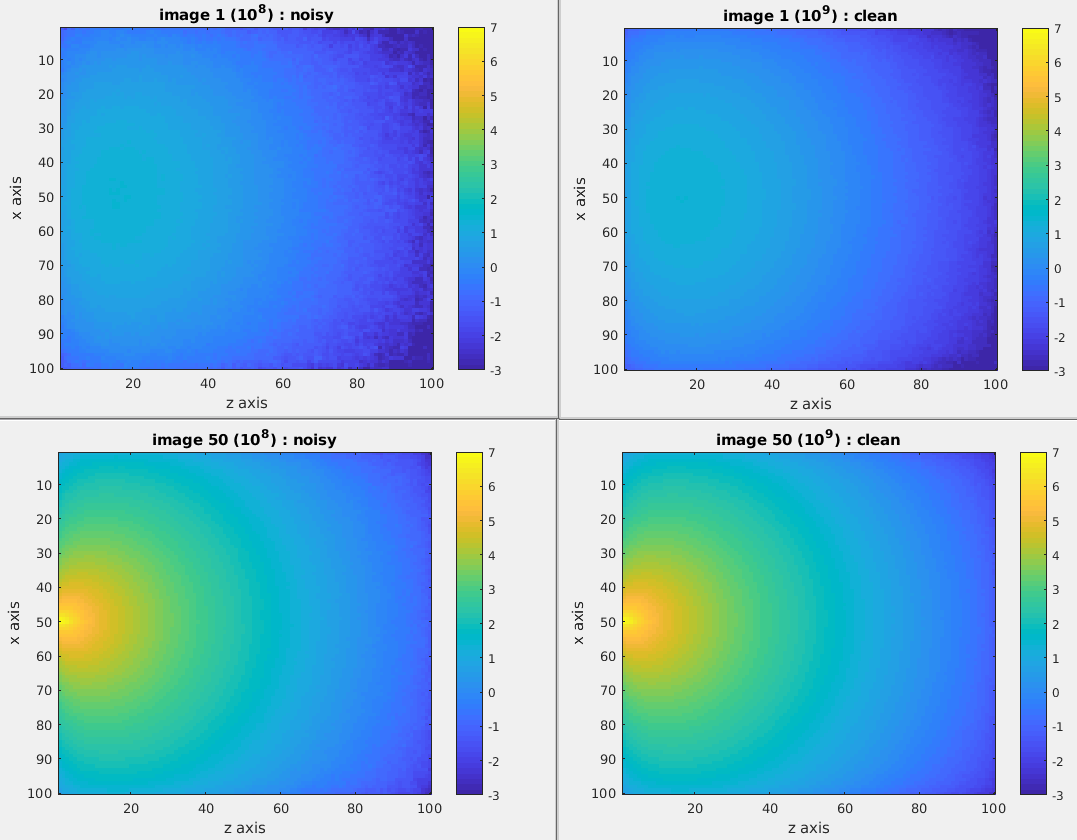

In [3]:
Image("figs/1e8_and_clean.png")